In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# URL to the raw CSV file on GitHub
data = "https://raw.githubusercontent.com/Ogeli50/Project-one/main/Employed_vs_Unemployed/file-2.csv"

# Display the DataFrame

df = pd.read_csv(data)

# Display data

print(df)

               Series ID  Year Period     Label   Value
0   SMS01000000000000001  2018    M01  2018 Jan  2028.4
1   SMS01000000000000001  2018    M02  2018 Feb  2031.6
2   SMS01000000000000001  2018    M03  2018 Mar  2035.9
3   SMS01000000000000001  2018    M04  2018 Apr  2039.1
4   SMS01000000000000001  2018    M05  2018 May  2040.5
..                   ...   ...    ...       ...     ...
70  SMS01000000000000001  2023    M11  2023 Nov  2179.2
71  SMS01000000000000001  2023    M12  2023 Dec  2181.0
72  SMS01000000000000001  2024    M01  2024 Jan  2181.7
73  SMS01000000000000001  2024    M02  2024 Feb  2186.5
74  SMS01000000000000001  2024    M03  2024 Mar  2191.1

[75 rows x 5 columns]


In [3]:
# Ensure that essential columns exist
required_columns = ['Year', 'Value']
if not all(column in df.columns for column in required_columns):
    raise ValueError(f"Missing required columns: {required_columns}")

# Ensure the 'Value' column is numeric and handle non-numeric values
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop rows with any NaN values in required columns
df.dropna(subset=required_columns, inplace=True)

# Separate the data by year
years = df['Year'].unique()
print(f"Unemployment Rates by Year: {years}")

# Create a summary DataFrame to store the statistics
summary = pd.DataFrame(columns=['Year', 'Mode', 'Median', 'Range'])

# Calculate the mode, median, and range for each year
for year in years:
    yearly_data = df[df['Year'] == year]
    
    # Select only the 'Value' column for calculations
    values = yearly_data['Value']
    
    # Calculate mode (most frequent value)
    mode = values.mode().iloc[0] if not values.mode().empty else None
    
    # Calculate median
    median = values.median()
    
    # Calculate range (max - min)
    data_range = values.max() - values.min()
    
    # Create a DataFrame for the current year's statistics
    current_summary = pd.DataFrame({
        'Year': [year],
        'Mode': [mode],
        'Median': [median],
        'Range': [data_range]
    })
    
    # Only concatenate if the current_summary is not empty
    if not current_summary.empty:
        summary = pd.concat([summary, current_summary], ignore_index=True)

# Display the summary DataFrame
print("Summary DataFrame:")
print(summary)


Unemployment Rates by Year: [2018 2019 2020 2021 2022 2023 2024]
Summary DataFrame:
   Year    Mode   Median  Range
0  2018  2028.4  2048.25   31.4
1  2019  2066.5  2079.25   17.7
2  2020  1844.8  2003.90  242.8
3  2021  2024.3  2048.85   58.7
4  2022  2082.9  2112.95   54.2
5  2023  2148.9  2164.55   32.1
6  2024  2181.7  2186.50    9.4


/var/folders/49/dwr6y0hj2ks1d2zvzxbjk6080000gn/T/ipykernel_2829/1336548284.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary = pd.concat([summary, current_summary], ignore_index=True)


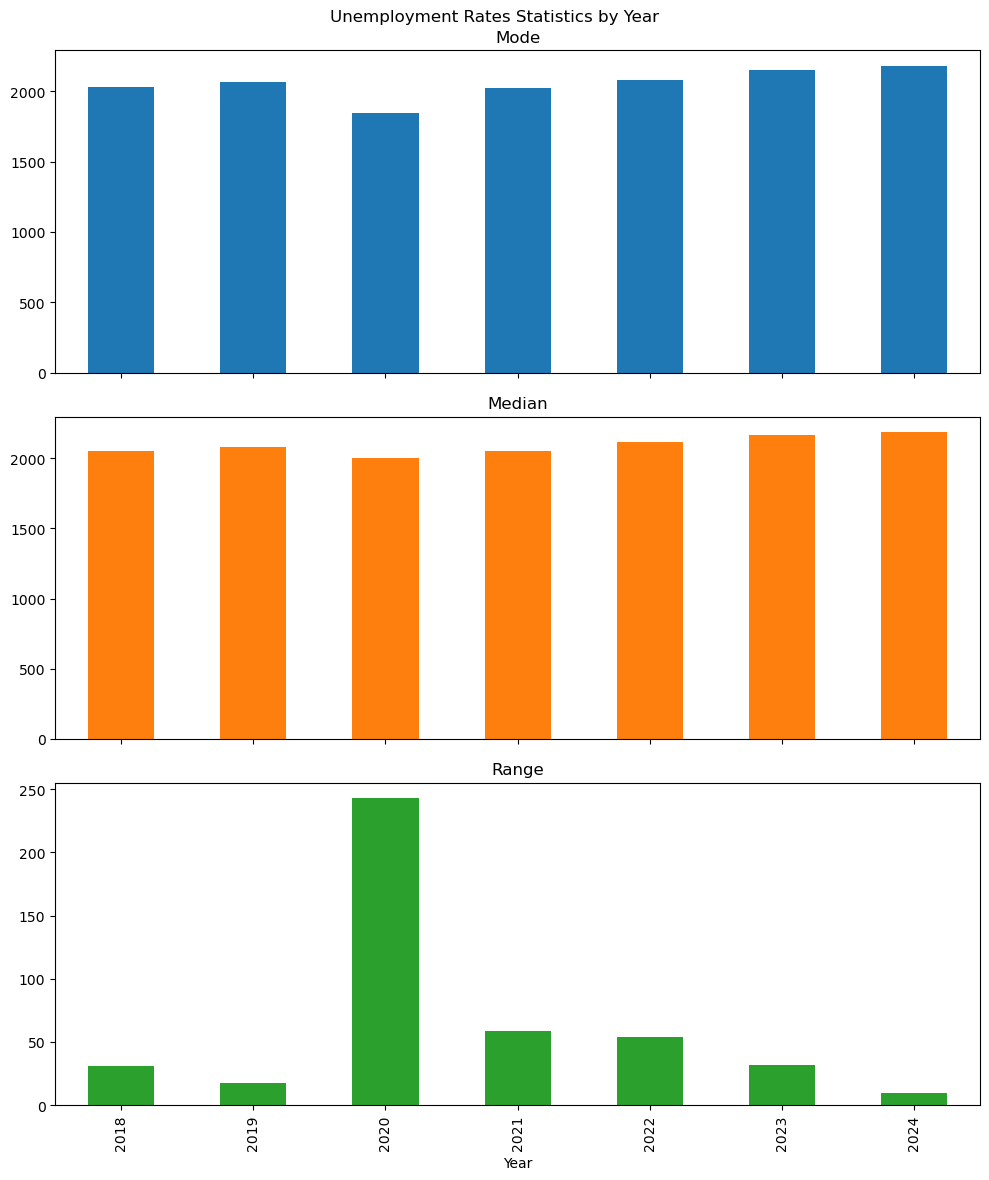

In [4]:
# Plot the statistics for visualization

summary.set_index('Year', inplace=True)
summary.plot(kind='bar', subplots=True, layout=(3, 1), figsize=(10, 12), legend=False, title='Unemployment Rates Statistics by Year')
plt.tight_layout()
plt.show()

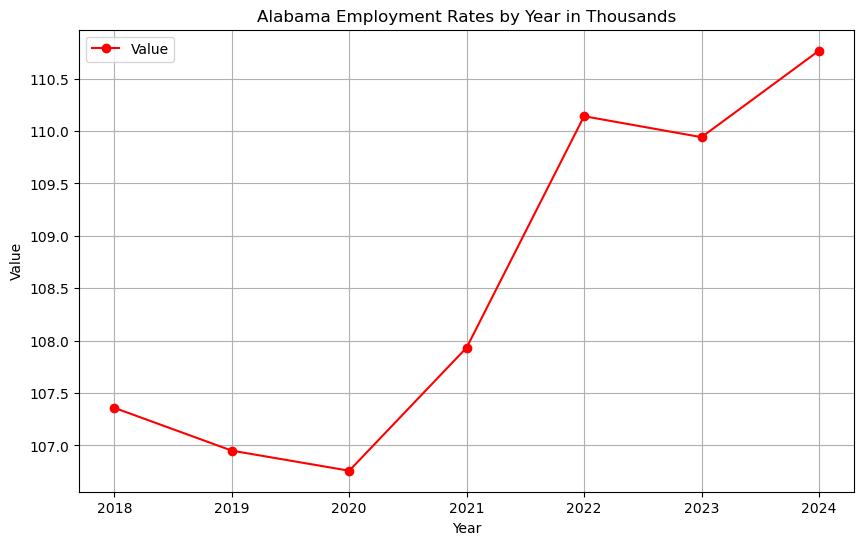

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# URL to the raw CSV file on GitHub
data_url = "https://raw.githubusercontent.com/Ogeli50/Project-one/aa80c6bd5f7dabd01043f89556f11c0474837e35/Employed_vs_Unemployed/file.csv"

# Load the DataFrame
df = pd.read_csv(data_url)

# Columns to check
required_columns = ['Year', 'Value']

# Ensure the 'Value' column is numeric and handle non-numeric values
if 'Value' in df.columns:
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop rows with any NaN values in required columns
df.dropna(subset=required_columns, inplace=True)

# Group the data by 'Year' and calculate the mean 'Value' for each year
yearly_summary = df.groupby('Year')['Value'].mean().reset_index()

# Create a line chart of 'Year' vs. mean 'Value'
plt.figure(figsize=(10, 6))
plt.plot(yearly_summary['Year'], yearly_summary['Value'], marker='o', linestyle='-', color='red', label='Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Alabama Employment Rates by Year in Thousands')
plt.legend()
plt.grid(True)
plt.show()
